# Cyclistic
### Bike Share 2021

The director of marketing believes the company’s future success depends on **maximizing the number of annual memberships**.

That's why the team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. 

## Importing pandas and numpy libraries to manipulate data

In [1]:
import pandas as pd
import numpy as np

### Loading data into pandas dataframes

In [2]:
# 2021
trips_2021_Q101 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202101-divvy-tripdata.csv")
trips_2021_Q102 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202102-divvy-tripdata.csv")
trips_2021_Q103 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202103-divvy-tripdata.csv")
trips_2021_Q204 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202104-divvy-tripdata.csv")
trips_2021_Q205 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202105-divvy-tripdata.csv")
trips_2021_Q206 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202106-divvy-tripdata.csv")
trips_2021_Q307 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202107-divvy-tripdata.csv")
trips_2021_Q308 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202108-divvy-tripdata.csv")
trips_2021_Q309 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202109-divvy-tripdata.csv")
trips_2021_Q410 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202110-divvy-tripdata.csv")
trips_2021_Q411 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202111-divvy-tripdata.csv")
trips_2021_Q412 = pd.read_csv("/Users/danbalictar/Documents/Python_Folder/Cyclistic Project/Datasets/202112-divvy-tripdata.csv")

### Merge dataframes into one for easier access

In [7]:
dfnames = [trips_2021_Q101,trips_2021_Q102,trips_2021_Q103,trips_2021_Q204,trips_2021_Q205,trips_2021_Q206,trips_2021_Q307,trips_2021_Q308,trips_2021_Q309,trips_2021_Q410,trips_2021_Q411,trips_2021_Q412,]

df = pd.concat(dfnames)

In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

### Cleaning

Dropping all with NA or Null values

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Checked duplicated rows by ride_id

In [23]:
df.duplicated(subset = "ride_id").sum()

0

### Changing date string to datetime

In [11]:
df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### Changing to categorical types

Categorical are a Pandas data type. A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory. The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”).

In [24]:
# Converting some columns as categorical data
df = df.astype({"rideable_type":"category","member_casual":"category"})
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object

Added specific columns for Month, Day, Year, Hour, and total ride length for time-related analysis

In [34]:
df["ride_length"] = (df["ended_at"] - df["started_at"])/pd.Timedelta(minutes = 1)
df["month"] = df["started_at"].dt.month_name().str.slice(stop=3)
df["date"] = df["started_at"].dt.day
df["day"] = df["started_at"].dt.day_name()
df["hour"] = df["started_at"].dt.hour

df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,month,date,day,hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7.216667,Jan,24,Sunday,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,4.533333,Jan,23,Saturday,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333,Jan,9,Saturday,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000,Jan,9,Saturday,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000,Jan,24,Sunday,15
14,49FCE1F8598F12C6,electric_bike,2021-01-22 15:15:28,2021-01-22 15:36:01,California Ave & Cortez St,17660,Wells St & Elm St,KA1504000135,41.900373,-87.696790,41.903272,-87.634457,member,20.550000,Jan,22,Friday,15
15,0FEED5C2C8749A1C,classic_bike,2021-01-05 10:33:12,2021-01-05 10:39:12,California Ave & Cortez St,17660,Sacramento Blvd & Franklin Blvd,KA1504000113,41.900363,-87.696704,41.890469,-87.702608,member,6.000000,Jan,5,Tuesday,10
16,E276FD43BDED6420,classic_bike,2021-01-30 11:59:16,2021-01-30 12:03:44,California Ave & Cortez St,17660,Western Ave & Walton St,KA1504000103,41.900363,-87.696704,41.898418,-87.686596,member,4.466667,Jan,30,Saturday,11
17,88BFCF66C2D585EC,electric_bike,2021-01-27 07:27:09,2021-01-27 07:45:32,California Ave & Cortez St,17660,Damen Ave & Clybourn Ave,13271,41.900313,-87.696792,41.931841,-87.677814,member,18.383333,Jan,27,Wednesday,7
18,8BD6F6510F5C8BD2,electric_bike,2021-01-15 08:54:41,2021-01-15 09:11:46,California Ave & Cortez St,17660,Damen Ave & Clybourn Ave,13271,41.900356,-87.696627,41.931922,-87.677856,member,17.083333,Jan,15,Friday,8


Converting the day and months column into categorical type

In [37]:
# days categories
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df["day"] = pd.Categorical(df["day"], categories = days)

# months categories
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["month"] = pd.Categorical(df["month"], categories = months)

In [38]:
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
ride_length                  float64
month                       category
date                           int64
day                         category
hour                           int64
dtype: object

### Further cleaning

I'll be needing to remove the impossible data of those with ride_length of < 0. 

In [48]:
# Count of rows with < 0 ride length
(df['ride_length']<0).sum()

116

I created a new dataframe that only contains rows with > 0 ride_length

In [49]:
df2 = df[df['ride_length']>0]
df2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,month,date,day,hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7.216667,Jan,24,Sunday,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,4.533333,Jan,23,Saturday,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333,Jan,9,Saturday,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000,Jan,9,Saturday,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000,Jan,24,Sunday,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247528,E06135F650553F21,electric_bike,2021-12-07 15:55:37,2021-12-07 16:00:17,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881372,-87.640042,41.888456,-87.644336,casual,4.666667,Dec,7,Tuesday,15
247532,8DF0DBB049906332,electric_bike,2021-12-01 16:50:52,2021-12-01 16:55:18,Canal St & Madison St,13341,Desplaines St & Kinzie St,TA1306000003,41.881999,-87.639265,41.888415,-87.644342,casual,4.433333,Dec,1,Wednesday,16
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,7.016667,Dec,6,Monday,19
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,8.283333,Dec,2,Thursday,8


Then removed the columns that are not time-related for my analysis ('start_lat', 'start_lng','end_lat','end_lng')

In [50]:
df2 = df2.drop(["start_lat","start_lng","end_lat","end_lng"], axis = 1)
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,month,date,day,hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,member,7.216667,Jan,24,Sunday,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,member,4.533333,Jan,23,Saturday,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,9.783333,Jan,9,Saturday,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,8.950000,Jan,9,Saturday,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,10.150000,Jan,24,Sunday,15


In [52]:
#set the number to non scientific
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [60]:
df2.describe(include='number')

,ride_length,date,hour
count,4588104,4588104,4588104
mean,22,15,14
std,184,9,5
min,0,1,0
25%,7,8,11
50%,12,15,15
75%,22,23,18
max,55944,31,23


# Descriptive Analysis (DA)

In [64]:
# aggregate to summarize data 
df2["ride_length"].agg([len,np.sum,np.mean,np.median,np.max,np.min])

len        4588104
sum      100075379
mean            22
median          12
amax         55944
amin             0
Name: ride_length, dtype: float64

#### Descriptive analysis of casual vs. member

In [65]:
df2.groupby("member_casual")["ride_length"].agg([len,np.sum,np.mean,np.median,np.max,np.min])

,len,sum,mean,median,amax,amin
member_casual,,,,,,
casual,2048302,66590608,33,17,55944,0
member,2539802,33484772,13,10,1496,0


#### Descriptive analysis of ride type by casual vs. member

In [66]:
df2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'ride_length', 'month', 'date',
       'day', 'hour'],
      dtype='object')

In [69]:
df2.groupby(['member_casual', 'rideable_type'])['ride_length'].agg([len,np.sum,np.mean,np.median,np.max,np.min])

len      sum  mean  median  amax  amin
member_casual rideable_type                                            
casual        classic_bike   1261508 32764300    26      16  1500     0
              docked_bike     312040 24370653    78      29 55944     0
              electric_bike   474754  9455654    20      13   480     0
member        classic_bike   1980328 26794670    14      10  1496     0
              docked_bike          1        3     3       3     3     3
              electric_bike   559473  6690099    12       9   478     0

#### Descriptive analysis of time(day) by casual vs. member

In [70]:
df2.groupby(['member_casual', 'day'])['ride_length'].agg([len,np.sum,np.mean,np.median,np.max,np.min])

len      sum  mean  median  amax  amin
member_casual day                                                 
casual        Monday     228931  7471676    33      17 31682     0
              Tuesday    214932  6190763    29      15 38923     0
              Wednesday  218129  6166427    28      14 38963     0
              Thursday   224204  6280179    28      14 49107     0
              Friday     290034  8967581    31      16 55692     0
              Saturday   468318 16331375    35      19 55944     0
              Sunday     403754 15182606    38      20 53922     0
member        Monday     346476  4408978    13       9  1474     0
              Tuesday    388120  4808038    12       9  1472     0
              Wednesday  397681  4954370    12       9  1461     0
              Thursday   373469  4613722    12       9  1467     0
              Friday     365774  4679205    13      10  1484     0
              Saturday   357070  5291702    15      11  1496     0
              Sunday     311212  4728757    15      11  1486     0

# Visualization

Load necessary libraries

In [71]:
import matplotlib as mpl # to help the set up of  default color
import matplotlib.pyplot as plt # to help visualization
import matplotlib.ticker as ticker # to help the set up of the axis number

### Casual vs Member

I used pie chart to visualize what percentage of our customers are members and users

In [168]:
# to set up default color for matplotlib visualizations

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#00B1D2FF", "#FDDB27FF"]) 

**44.6%** of our customers are *casual* or non-member. **55.4%** of them are *members*

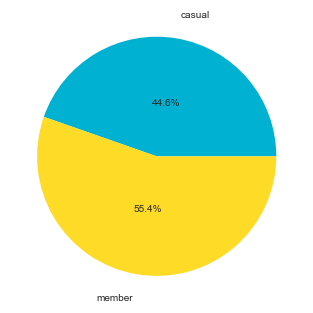

In [169]:
# plotting pie

plt.pie(df2["member_casual"].value_counts(ascending = True), autopct="%.1f%%", labels = ['casual', 'member'], labeldistance = 1.2, pctdistance = 0.45)
plt.show()

Divided bar for the exact number for each

In [170]:
df2_cm = df2.groupby("member_casual")["ride_length"].agg([len,np.sum,np.mean])

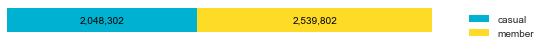

In [171]:
fig, ax = plt.subplots(figsize = (8,0.5))
ax.barh(" ", df2_cm.loc["casual","len"])
ax.barh(" ", df2_cm.loc["member","len"], left = df2_cm.loc["casual","len"])
ax.legend(df2_cm.index, bbox_to_anchor=(1.2, 1.02) )
ax.bar_label(ax.containers[0], label_type = 'center', color = 'black', fmt='%.f', labels=[f'{x:,.0f}' for x in ax.containers[0].datavalues])
ax.bar_label(ax.containers[1], label_type = 'center', color = 'black', fmt='%.f', labels=[f'{x:,.0f}' for x in ax.containers[1].datavalues])

plt.axis('off')
plt.show()

I found that even though there are more riders with membership with Cyclistic, non-member or casuals ride longer than members. 

#### Total ride length by casual vs. member (mins)

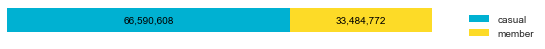

In [172]:
fig, ax = plt.subplots(figsize = (8,0.5))
ax.barh(" ", df2_cm.loc["casual","sum"])
ax.barh(" ", df2_cm.loc["member","sum"], left = df2_cm.loc["casual","sum"])
ax.legend(df2_cm.index, bbox_to_anchor=(1.2, 1.02) )
ax.bar_label(ax.containers[0], label_type = 'center', color = 'black',fmt='%.f mins', labels=[f'{x:,.0f}' for x in ax.containers[0].datavalues])
ax.bar_label(ax.containers[1], label_type = 'center', color = 'black', fmt='%.f mins', labels=[f'{x:,.0f}' for x in ax.containers[1].datavalues])

plt.axis('off')
plt.show()

#### Average ride length by casual vs. member (mins)

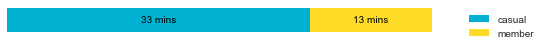

In [173]:
fig, ax = plt.subplots(figsize = (8,0.5))
ax.barh(" ", df2_cm.loc["casual","mean"])
ax.barh(" ", df2_cm.loc["member","mean"], left = df2_cm.loc["casual","mean"])
ax.legend(df2_cm.index, bbox_to_anchor=(1.2, 1.02) )
ax.bar_label(ax.containers[0], label_type = 'center', color = 'black',fmt='%.f mins')
ax.bar_label(ax.containers[1], label_type = 'center', color = 'black', fmt='%.f mins')

plt.axis('off')
plt.show()

#### Total ride of ride type by casual vs. member

In [175]:
#set style and defaul color
plt.style.use('seaborn')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#00B1D2FF", "#FDDB27FF"]) 

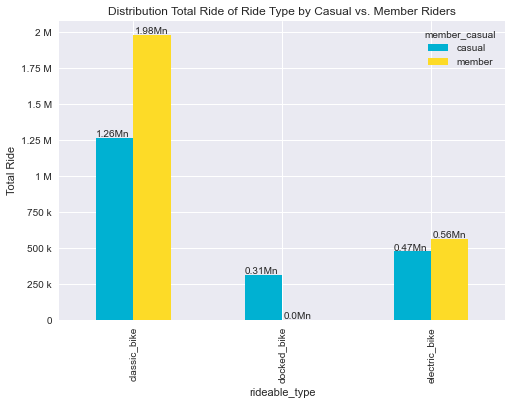

In [176]:
df2_rt = df2.pivot_table(index = 'rideable_type', values = 'ride_length', columns = 'member_casual',aggfunc = [len, np.mean])

ax = df2_rt["len"].plot.bar()

for i, number in enumerate(df2_rt['len']['casual']):
    plt.text(x=i-0.25, y= number + 10000, s=str(round((number/1000000),2)) + "Mn" )
for i, number in enumerate(df2_rt['len']['member']):
    plt.text(x=i+.01, y= number + 10000, s=str(round((number/1000000),2)) + "Mn" )

ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set(ylabel = "Total Ride", title = "Distribution Total Ride of Ride Type by Casual vs. Member Riders")

plt.show()

#### Average ride length of ride type by casual vs. member

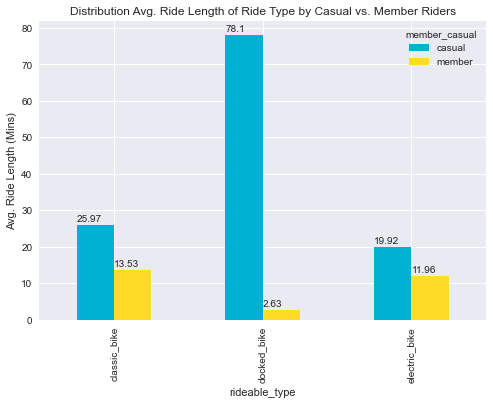

In [177]:
ax = df2_rt["mean"].plot.bar()

for i, number in enumerate(df2_rt['mean']['casual']):
    plt.text(x=i-0.25, y= number + 1, s=round(number,2))
for i, number in enumerate(df2_rt['mean']['member']):
    plt.text(x=i, y= number + 1, s=round(number,2))

ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set(ylabel = "Avg. Ride Length (Mins)", title = "Distribution Avg. Ride Length of Ride Type by Casual vs. Member Riders")

plt.show()

The above shows that casual riders on docked bike have longer ride length. 

## Time-related analyses

In [178]:
month_bar = df2.groupby(["member_casual","month"])["ride_length"].count()

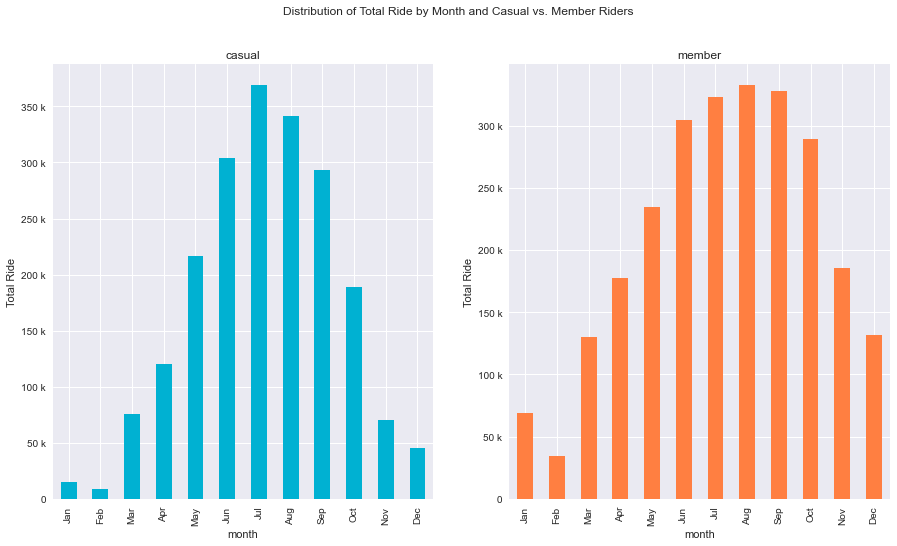

In [182]:
fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = month_bar["casual"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total Ride')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())


ax2 = month_bar["member"].plot.bar(ax =ax[1], title = 'member', color= '#FF7F41FF', ylabel = 'Total Ride')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

fig.suptitle('Distribution of Total Ride by Month and Casual vs. Member Riders')


plt.show()

The above figure shows that the number of ride peaks during summer (Jun to Sep) for both casuals and members while it's the lowest during the winter, specially on February

I also distributed the number of riders per day in a month to identify what part of the month has the most number of riders (excluding day 31 since not all months has it). While the data below shows consistent pattern in number of riders, the distribution is decreasing towards the end of the month

In [183]:
date_bar = df2.groupby(["member_casual","date"])["ride_length"].count()

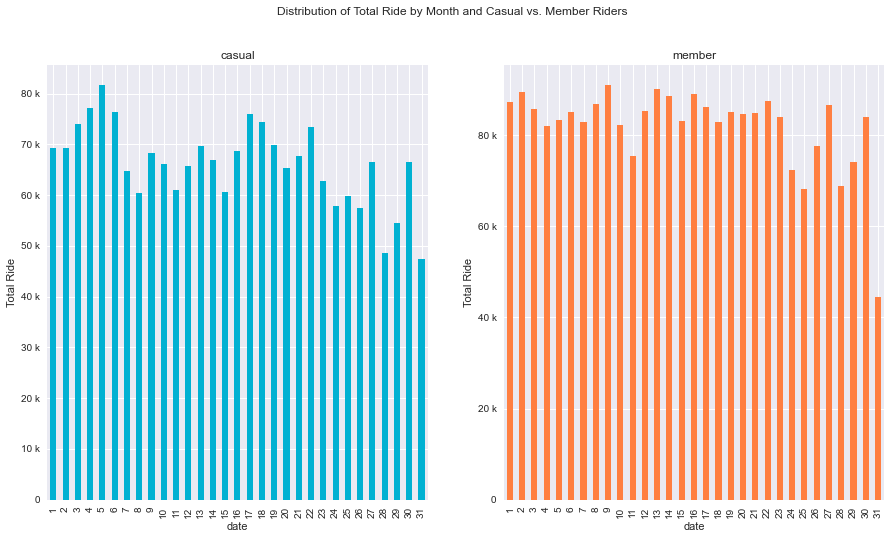

In [184]:
fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = date_bar["casual"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total Ride')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())


ax2 = date_bar["member"].plot.bar(ax =ax[1], title = 'member', color='#FF7F41FF', ylabel = 'Total Ride')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

fig.suptitle('Distribution of Total Ride by Month and Casual vs. Member Riders')


plt.show()

I also checked which day in a week has the most/least number of riders

In [185]:
day_bar = df2.groupby(["member_casual","day"])["ride_length"].agg([len, np.mean])

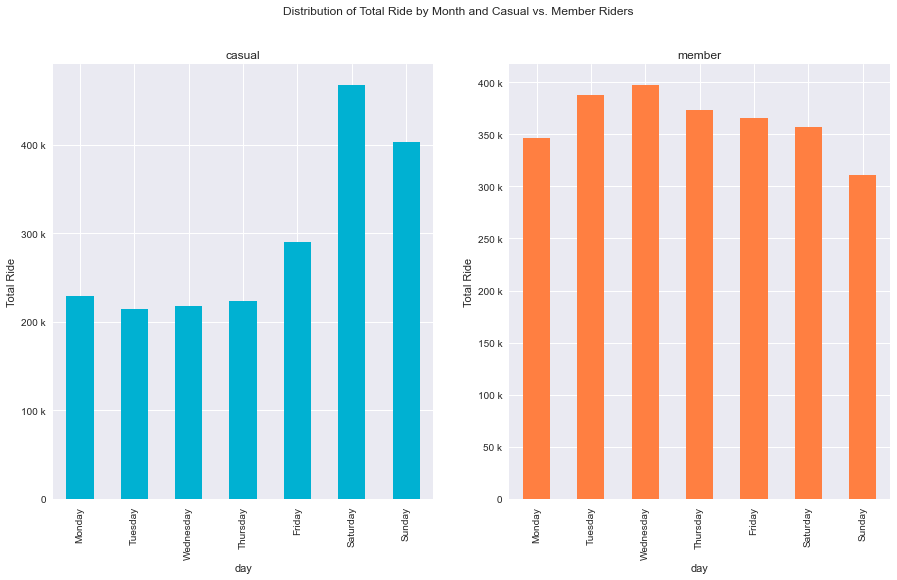

In [186]:
fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = day_bar.loc["casual", "len"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total Ride')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())

ax2 = day_bar.loc["member","len"].plot.bar(ax =ax[1], title = 'member' , color= '#FF7F41FF', ylabel = 'Total Ride')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

fig.suptitle('Distribution of Total Ride by Month and Casual vs. Member Riders')

plt.show()

We can see in the above figures that we have the highest number of casual riders during the weekend (Sat-Sun).
While number of members do not show significant difference for each day, we can see that the number of member riders decrease towards the end of the week.

Meanwhile, it shows in the below figures that both casual and member riders have a higher average length of ride during the weekends

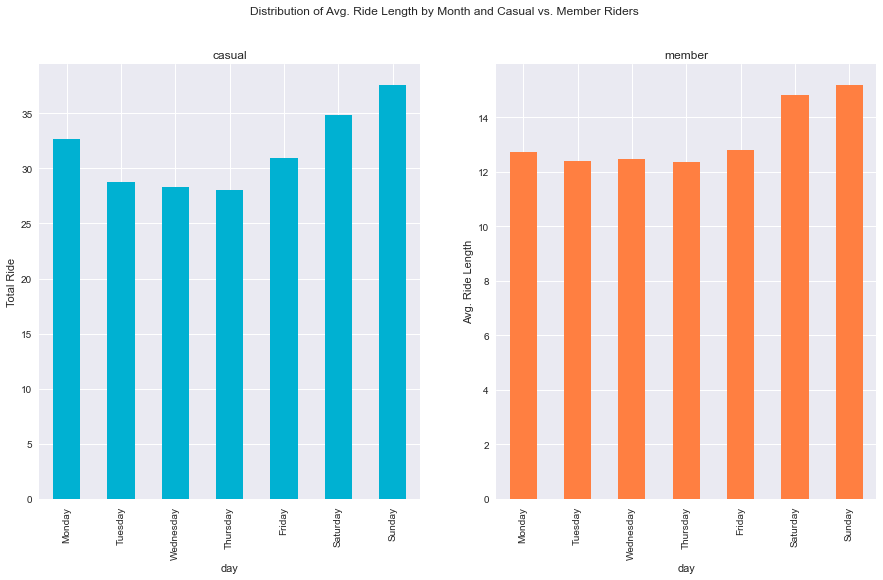

In [187]:
fig,ax = plt.subplots(1,2, figsize = (15,8))

ax1 = day_bar.loc["casual", "mean"].plot.bar(ax =ax[0], title = 'casual', ylabel = 'Total Ride')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())

ax2 = day_bar.loc["member","mean"].plot.bar(ax =ax[1], title = 'member' , color= '#FF7F41FF', ylabel = 'Avg. Ride Length')
ax2.yaxis.set_major_formatter(ticker.EngFormatter())

fig.suptitle('Distribution of Avg. Ride Length by Month and Casual vs. Member Riders')

plt.show()

In [188]:
hour_line = df2.pivot_table(index = "hour", columns = "member_casual", values = "ride_length", aggfunc = len)

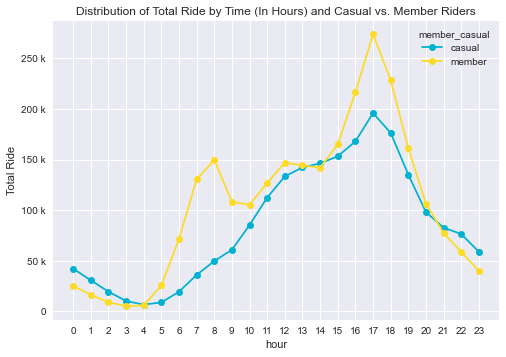

In [189]:
ax = hour_line.plot(marker = 'o', ylabel = "Total Ride", title = "Distribution of Total Ride by Time (In Hours) and Casual vs. Member Riders")
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_xticks(hour_line.index)

plt.show()

The above shows that the number of riders is the highest at around 4PM to 6PM while lowest towards the end of the day from 8PM

## Analysis of the area

Below figures show the **Top START Stations** in terms of Total rides

In [193]:
# Excluded the Start Station names with null values 
ss_bar = df2.groupby(["member_casual","start_station_name"])["ride_length"].count().sort_values(ascending = False)

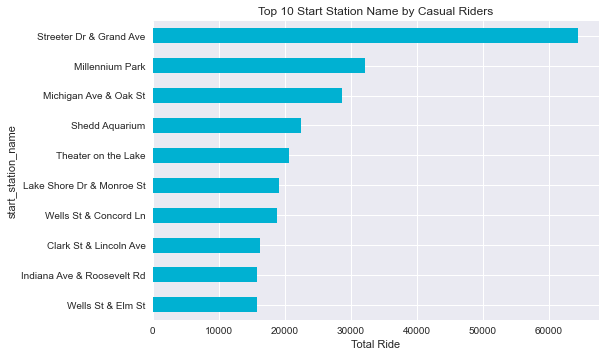

In [194]:
ax = ss_bar.loc["casual"][:10].plot.barh()
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride', title = "Top 10 Start Station Name by Casual Riders")


plt.show()

**Streeter Drive & Grand Avenue** has the highest number of Total Rides for *Casual* riders

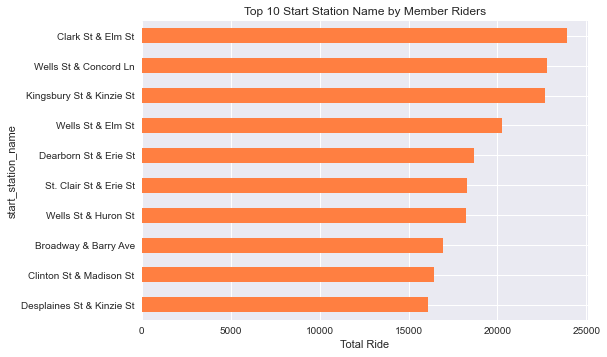

In [197]:
ax = ss_bar.loc["member"][:10].plot.barh(color= '#FF7F41FF')
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride', title = "Top 10 Start Station Name by Member Riders")


plt.show()

**Clark Street and Elm Street** has the highest number of Total Rides for *Member* riders

Below figures show the **Top END Stations** in terms of Total rides

In [198]:
# Also excluding null
es_bar = df2.groupby(["member_casual","end_station_name"])["ride_length"].count().sort_values(ascending = False)

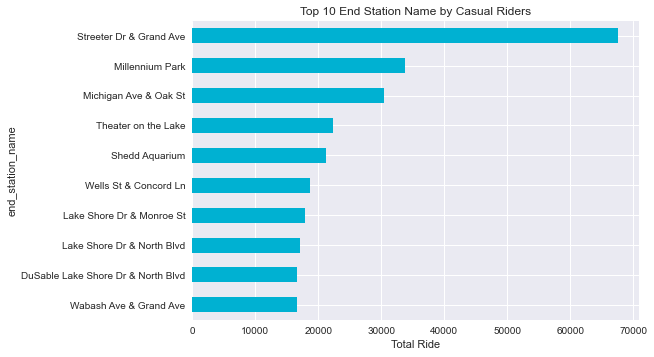

In [199]:
ax = es_bar.loc["casual"][:10].plot.barh()
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride', title = "Top 10 End Station Name by Casual Riders")


plt.show()

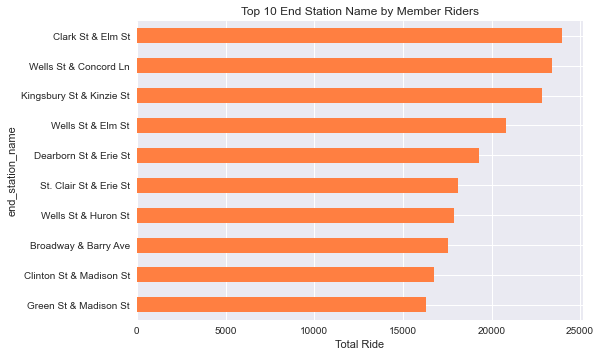

In [200]:
ax = es_bar.loc["member"][:10].plot.barh(color= '#FF7F41FF')
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride', title = "Top 10 End Station Name by Member Riders")


plt.show()

**Same stations** have the highest total ride for End stations

# Conclusion

The above data will be used by the team to design a new marketing strategy. The goal is to convert *casual* riders into ***annual members***. 

### Summary
1. While there are more **members** than **casual** riders, **casual** riders have a higher Total and Average ride length. 
2. Both casual and member riders prefer to use **classic bikes** the most. Then others use electric bikes and least of them use docked bikes
3. Total rides are highest during the summer, particularly July for Casual and August for Members, and lowest during the winter, particularly February for both member and casual riders.
4. Both rides are at lowest point at the end of every month. Total ride is highest during the weekend for **casual** riders while the number decreases towards the end of the week for **members**. Highest number of riders happen at 4PM-6PM of the day and lowest from  8PM onwards.
5. **Streeter Drive & Grand Avenue** and **Clark Street and Elm Street** have the highest total rides as a Start and End point

### Recommendations

- Identify which of our casual customer bikes during the **weekend around 4PM to 6PM with longer average ride duration** 
- **Promotions**: We can offer casual riders promotions that will encourage subscription as a member
    - Lower price during the summer period
    - Lower price/weekend special offers